In [9]:
import warnings
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
configs = {
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    # 'font.sans-serif': ['Microsoft YaHei', 'SimHei', 'Arial', 'Liberation Sans', 'sans-serif'],
    'font.sans-serif': ['Palatino', 'Microsoft YaHei', 'SimHei', 'Arial', 'Liberation Sans', 'sans-serif'],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'mathtext.fontset': "cm",
    # 'mathtext.rm': "asana math",
    # 'mathtext.cal': "asana math",
    "font.size": 16,
    # 'axes.labelsize': 'large',
    # 'axes.labelpad': 8.0,
    # 'xtick.major.pad': 9.0,
}
rc.update(configs)
import os

# import matplotlib.font_manager
# font_path = "/home/nanxi/.local/share/fonts/Palatino-Linotype-Regular.ttf"
# if os.path.exists(font_path):
#     matplotlib.font_manager.fontManager.addfont(font_path)
#     prop = matplotlib.font_manager.FontProperties(fname=font_path)
#     plt.rcParams['font.family'] = prop.get_name()
#     print(f"Set font to {prop.get_name()}")

In [10]:
import pandas as pd
df_jax = pd.read_csv("./points_benchmark_jax_batched_3000freqs.txt").to_numpy()[1:]
df_torch = pd.read_csv("./points_benchmark_torch_batched_3000freqs.txt").to_numpy()[1:]
df_numpy = pd.read_csv("./points_benchmark_numpy_batched_3000freqs.txt").to_numpy()[1:]

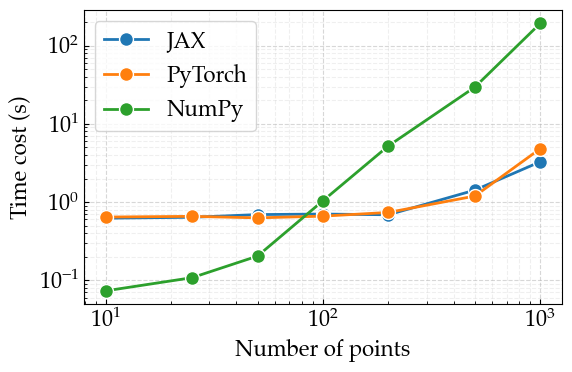

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
kwargs = dict(lw=2, marker='o', markeredgecolor='white', markersize=10)
ax.plot(df_jax[:, 0], df_jax[:, 1], label="JAX", **kwargs)
ax.plot(df_torch[:, 0], df_torch[:, 1], label="PyTorch", **kwargs)
ax.plot(df_numpy[:, 0], df_numpy[:, 1], label="NumPy", **kwargs)
ax.set(
    xlabel="Number of points",
    ylabel="Time cost (s)",
    # title="Time Cost Comparison: JAX vs PyTorch vs NumPy",
)
ax.set_xscale("log",)
ax.set_yscale("log",)

# 加入副网格线，主网格线10倍间隔，副网格线2倍间隔
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend()
fig.tight_layout()
fig.savefig("../img/points_time_cost_comparison.png", dpi=300, bbox_inches='tight')
fig.savefig("../img/points_time_cost_comparison.pdf", dpi=300, bbox_inches='tight')
fig.savefig("../../wind_simulation_paper/points_time_cost_comparison.pdf", dpi=300, bbox_inches='tight')


In [4]:
import pandas as pd
df_jax = pd.read_csv("./freq_benchmark_jax_batched_100pts.txt").to_numpy()[1:]
df_torch = pd.read_csv("./freq_benchmark_torch_batched_100pts.txt").to_numpy()[1:]
df_numpy = pd.read_csv("./freq_benchmark_numpy_batched_100pts.txt").to_numpy()[1:]

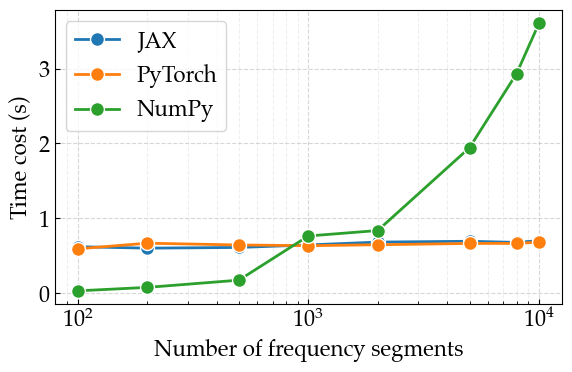

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
kwargs = dict(lw=2, marker='o', markeredgecolor='white', markersize=10)
ax.plot(df_jax[:, 0], df_jax[:, 1], label="JAX", **kwargs)
ax.plot(df_torch[:, 0], df_torch[:, 1], label="PyTorch", **kwargs)
ax.plot(df_numpy[:, 0], df_numpy[:, 1], label="NumPy", **kwargs)
ax.set(
    xlabel="Number of frequency segments",
    ylabel="Time cost (s)",
    # title="Time Cost Comparison: JAX vs PyTorch vs NumPy",
)
ax.set_xscale("log",)
# ax.set_yscale("log",)
# ax.set_xlim(-20, 5050)
# ax.set_ylim(-10, 140)
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.legend()
fig.tight_layout()
fig.savefig("../img/freq_time_cost_comparison.png", dpi=300, bbox_inches='tight')
fig.savefig("../img/freq_time_cost_comparison.pdf", dpi=300, bbox_inches='tight')
fig.savefig("../../wind_simulation_paper/freq_time_cost_comparison.pdf", dpi=300, bbox_inches='tight')


In [6]:
import pandas as pd
df_100 = pd.read_csv("./freq_benchmark_jax_batched_100pts.txt").to_numpy()[1:]
df_200 = pd.read_csv("./freq_benchmark_jax_batched_200pts.txt").to_numpy()[1:]
df_500 = pd.read_csv("./freq_benchmark_jax_batched_500pts.txt").to_numpy()[1:]
df_1000 = pd.read_csv("./freq_benchmark_jax_batched_1000pts.txt").to_numpy()[1:]
df_1500 = pd.read_csv("./freq_benchmark_jax_batched_1500pts.txt").to_numpy()[1:]
dfs = [df_100, df_200, df_500, df_1000, df_1500]
num = [100, 200, 500, 1000, 1500]

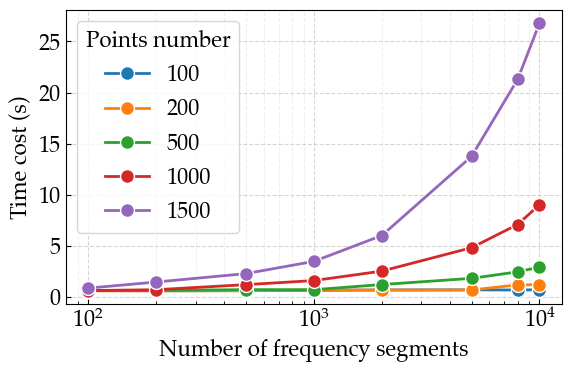

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
kwargs = dict(lw=2, marker='o', markeredgecolor='white', markersize=10)
# cmap = plt.get_cmap("coolwarm")
for i, df in enumerate(dfs):
    ax.plot(df[:, 0], df[:, 1], label=f"{num[i]}", **kwargs)
ax.set(
    xlabel="Number of frequency segments",
    ylabel="Time cost (s)",
    # title="Time Cost Comparison: JAX vs PyTorch vs NumPy",
)
ax.set_xscale("log",)
# ax.set_yscale("log",)
# ax.set_xlim(-20, 5050)
# ax.set_ylim(-10, 140)
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
# ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.legend(title="Points number")
fig.tight_layout()
fig.savefig("../img/freq_time_cost_jax_varing_points.png", dpi=300, bbox_inches='tight')
fig.savefig("../img/freq_time_cost_jax_varing_points.pdf", dpi=300, bbox_inches='tight')
fig.savefig("../../wind_simulation_paper/freq_time_cost_jax_varing_points.pdf", dpi=300, bbox_inches='tight')